In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [3]:
df = pd.read_csv("E:/data science/machine learning/practice examples/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [9]:
mv = df.isnull().sum()
mv[mv > 0]

ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64

In [14]:
df['ph'].mean()

7.080794504276819

In [15]:
df['ph'].mean()

7.080794504276819

In [18]:
df['ph'].fillna(df['ph'].mean(), inplace=True)

In [19]:
mv = df.isnull().sum()
mv[mv > 0]

Sulfate            781
Trihalomethanes    162
dtype: int64

In [23]:
df['Sulfate'].mean()

333.7757766108134

In [25]:
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)

In [29]:
df['Trihalomethanes'].mean()

66.39629294676803

In [30]:
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

In [31]:
mv = df.isnull().sum()
mv[mv > 0]

Series([], dtype: int64)

In [32]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Solids'>

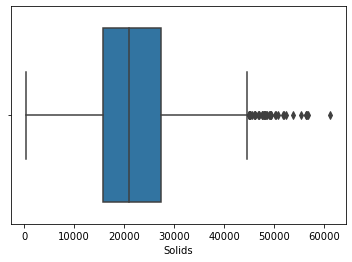

In [42]:
sns.boxplot(df['Solids'])

In [39]:
def outlier_detection(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3-Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outlier = dataframe[(dataframe > upper_end)| (dataframe < lower_end)]
    return outlier

In [44]:
outlier_detection(df['Solids'])

142     46140.126850
186     45222.506665
283     48621.563952
287     46113.957485
366     52318.917298
378     45249.449033
405     46931.884293
516     45510.584319
546     49074.730407
613     44868.458368
666     52060.226800
987     48002.084596
1031    56867.859236
1068    55334.702799
1077    48410.471014
1096    45141.686036
1186    56351.396304
1302    44896.984112
1332    45166.912141
1343    48204.172192
1445    45166.639389
1462    45939.689158
1527    46718.555965
1554    56488.672413
1556    45243.028953
1746    49125.360084
1784    50279.262429
1815    45041.149139
1858    46077.358485
1955    49009.924656
1984    47022.745845
2012    47852.888871
2497    49341.421279
2602    61227.196008
2680    48175.852093
2758    47591.283183
2891    45050.002276
2993    45148.808118
3014    49456.587108
3062    44982.734155
3130    50793.898917
3150    56320.586979
3162    53735.899194
3190    50166.533323
3226    51731.820553
3236    48007.868134
3271    47580.991603
Name: Solids,

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df)
df_scaled[:5]

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01,
         1.12414846e-01,  9.61357416e-01,  1.70895423e+00,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00,
        -7.99774743e-01],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01,
        -3.07693708e-01,  0.00000000e+00,  2.06257500e+00,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01,
        -7.99774743e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01,
         1.36059386e+00,  0.00000000e+00, -9.40321148e-02,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00,
        -7.99774743e-01],
       [ 8.40950402e-01,  5.47651374e-01,  4.93304442e-04,
         5.92007821e-01,  6.39518996e-01, -7.78829962e-01,
         1.25513443e+00,  2.15287376e+00,  8.48411520e-01,
        -7.99774743e-01],
       [ 1.36856889e+00, -4.64429087e-01, -4.60248570e-01,
        -3.63697933e-01, -6.54176512e-01, -3.43938909e-01,
        -8.24357169e-01, -2.18159864e+00,  1.38785531e-01,
        -7.

In [46]:
from sklearn.decomposition import PCA

In [47]:
##pca_bc = PCA(random_state = 100)
pca_bc = PCA(.95,random_state = 100)
pca_data = pca_bc.fit_transform(df_scaled)

In [48]:
pca_bc.explained_variance_ratio_

array([0.12059296, 0.11398325, 0.10652414, 0.10260794, 0.09941514,
       0.09903813, 0.09667509, 0.09483578, 0.08790328, 0.07842429])

In [49]:
cum_ratio = np.cumsum(pca_bc.explained_variance_ratio_) 
print(cum_ratio[cum_ratio < 0.96])

[0.12059296 0.23457621 0.34110035 0.44370829 0.54312343 0.64216156
 0.73883665 0.83367243 0.92157571]


In [50]:
X = df.drop("Potability", axis = 1).values
y = df["Potability"].values

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)
lr_model = LogisticRegression()

In [59]:
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
yt_pred = lr_model.predict(X_test)


In [64]:
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      0.61      0.75      2619
           1       0.00      1.00      0.00         1

    accuracy                           0.61      2620
   macro avg       0.50      0.80      0.38      2620
weighted avg       1.00      0.61      0.75      2620

